In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
import copy
gc.enable()

In [2]:
# set game to run and initialize 


problem_name = "recyling"
planning_horizon = 2
gametype = "stackelberg"
sota = False
num_iterations = 3

decpomdp = DecPOMDP(problem_name,horizon=planning_horizon)
PROBLEM.initialize(decpomdp)
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
belief_space= BeliefSpace(planning_horizon,0.02)
belief_space.monte_carlo_expansion()
# belief_space.add_samples(40)
print(belief_space.time_index_table)
belief_space.reset()
belief_space.expansion()
print(belief_space.time_index_table)

belief_space.size_at_horizon(2)

	Monte-Carlo belief expansion done with density = 0.02 , resulting belief space size = 6

{0: {0}, 1: {0, 1, 2, 3}, 2: {0, 1, 2, 3, 4, 5}, 3: {0, 1, 2, 3, 4, 5}, 4: {0, 1, 2, 3, 4, 5}, 5: set()}
	belief expansion to horizon 5 done with density = 0.02 , resulting belief space size = 5

{0: {0}, 1: {0, 1, 2}, 2: {0, 1, 2, 3, 4}, 3: {0, 1, 2, 3, 4}, 4: {0, 1, 2, 3, 4}, 5: set()}


5

In [4]:
prob = PROBLEM.get_instance()
print(decpomdp.states)
print(decpomdp.joint_actions)
action = 1
state = 0
prob.REWARDS["generalsum"]

['tiger-left', 'tiger-right']
[('listen', 'listen'), ('listen', 'open-left'), ('listen', 'open-right'), ('open-left', 'listen'), ('open-left', 'open-left'), ('open-left', 'open-right'), ('open-right', 'listen'), ('open-right', 'open-left'), ('open-right', 'open-right')]


[array([[  -2.,   -2.],
        [ -40.,   50.],
        [  -4.,   -4.],
        [-100.,   60.],
        [ -50.,   70.],
        [-100.,   60.],
        [  25.,  -20.],
        [ -15.,   30.],
        [  30.,  -20.]]),
 array([[  -2.,   -2.],
        [ -20.,   25.],
        [  60., -100.],
        [  -4.,   -4.],
        [ -20.,   30.],
        [  60., -100.],
        [  50.,  -40.],
        [  30.,  -15.],
        [  70.,  -50.]])]

In [5]:
[np.array([[-2,-1],
  [-10,-10],
  [-11,-11],
  [5,-15]
  ]),
 np.array([[-1,-1],
  [-10,-10],
  [0,0],
  [15,-5]
  ])
]

[array([[ -2,  -1],
        [-10, -10],
        [-11, -11],
        [  5, -15]]),
 array([[ -1,  -1],
        [-10, -10],
        [  0,   0],
        [ 15,  -5]])]

In [6]:
[np.array([[-1,-1,-1,-2],
  [0,0,1,1],
  [-1,0,-1,0],
  [0,0,0,0]
  ]),
 np.array([[-1,-1,-1,-2],
  [-1,-1,0, 0,],
  [0,1,0,1],
  [0,0,0,0]
  ])
]

[array([[-1, -1, -1, -2],
        [ 0,  0,  1,  1],
        [-1,  0, -1,  0],
        [ 0,  0,  0,  0]]),
 array([[-1, -1, -1, -2],
        [-1, -1,  0,  0],
        [ 0,  1,  0,  1],
        [ 0,  0,  0,  0]])]

In [7]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations)
# experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


	Monte-Carlo belief expansion done with density = 0.2 , resulting belief space size = 4

Added samples to the beleif space, with density =0.04 , new belief space size = 4 with 0 new belief points
0 : {0} 
1 : {0, 1, 2, 3} 
2 : {0, 1, 2, 3} 
3 : {0, 1, 2, 3} 
4 : {0, 1, 2, 3} 
Added samples to the beleif space, with density =0.008 , new belief space size = 4 with 0 new belief points
0 : {0} 
1 : {0, 1, 2, 3} 
2 : {0, 1, 2, 3} 
3 : {0, 1, 2, 3} 
4 : {0, 1, 2, 3} 
			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = None , Belief space size = 4
iteration : 0

========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = False , Belief space size = 4
iteration : 0

========== 

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density
0,1,cooperative,Stackelberg,1,0.044378,4,9.0,"[9.0, 9.0]",0.200
1,1,cooperative,State of the Art,1,0.000166,4,9.0,"[9.0, 9.0]",0.200
2,1,cooperative,Stackelberg,2,0.019931,4,9.0,"[9.0, 9.0]",0.040
3,1,cooperative,State of the Art,2,0.000136,4,9.0,"[9.0, 9.0]",0.040
4,1,cooperative,Stackelberg,3,0.015427,4,9.0,"[9.0, 9.0]",0.008
...,...,...,...,...,...,...,...,...,...
85,5,generalsum,State of the Art,1,0.244150,4,150.0,"[70.0, -15.0]",0.200
86,5,generalsum,Stackelberg,2,0.475068,4,150.0,"[180.0, 95.0]",0.040
87,5,generalsum,State of the Art,2,0.249817,4,150.0,"[70.0, -15.0]",0.040
88,5,generalsum,Stackelberg,3,0.363271,5,150.0,"[180.0, 95.0]",0.008


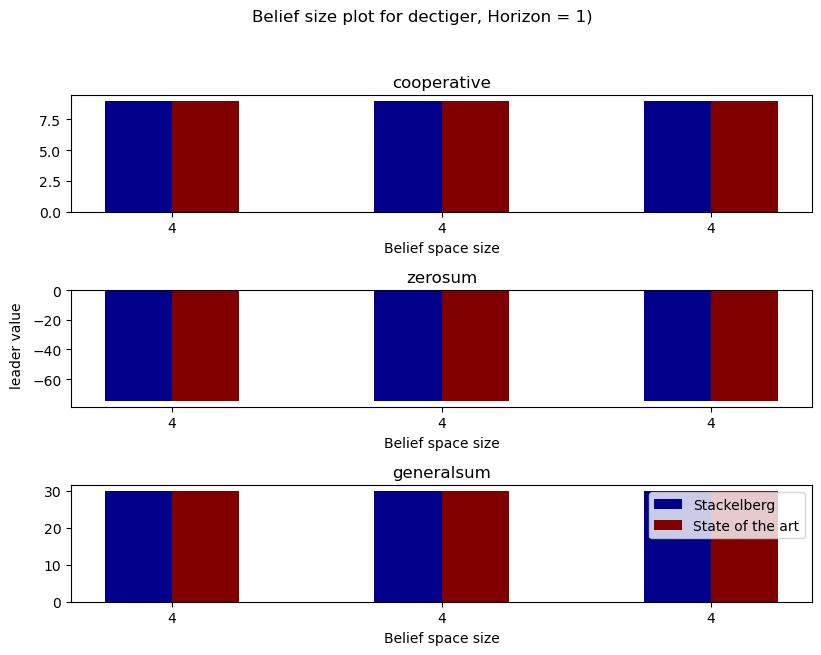

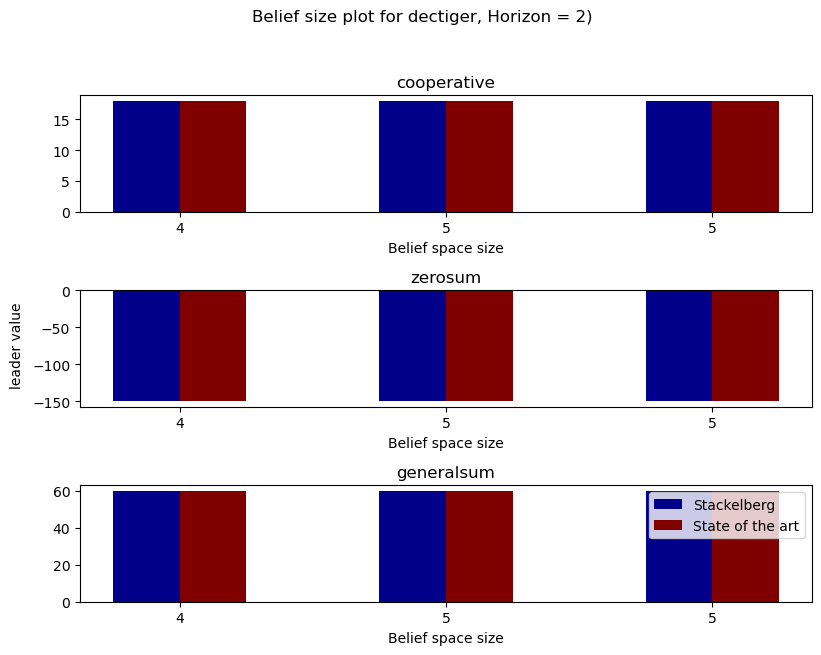

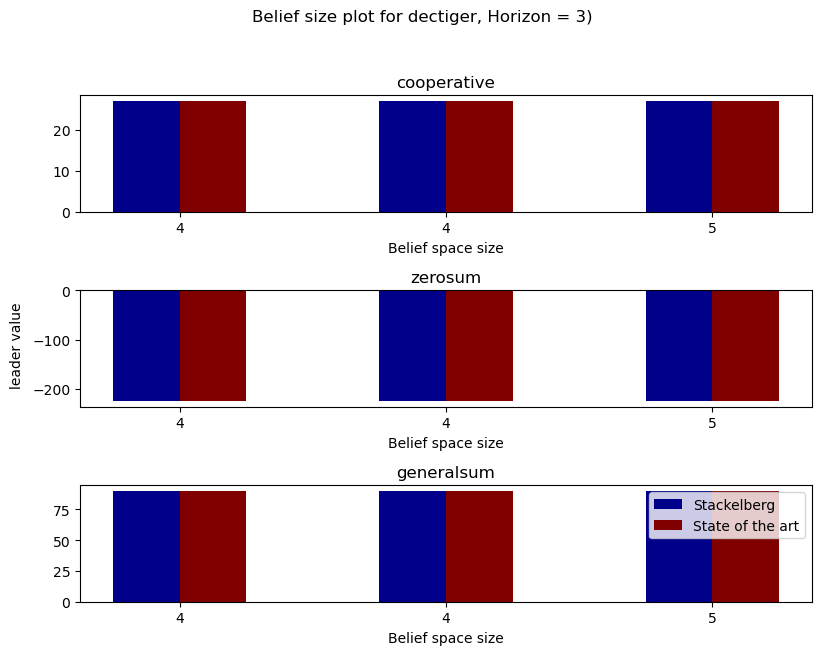

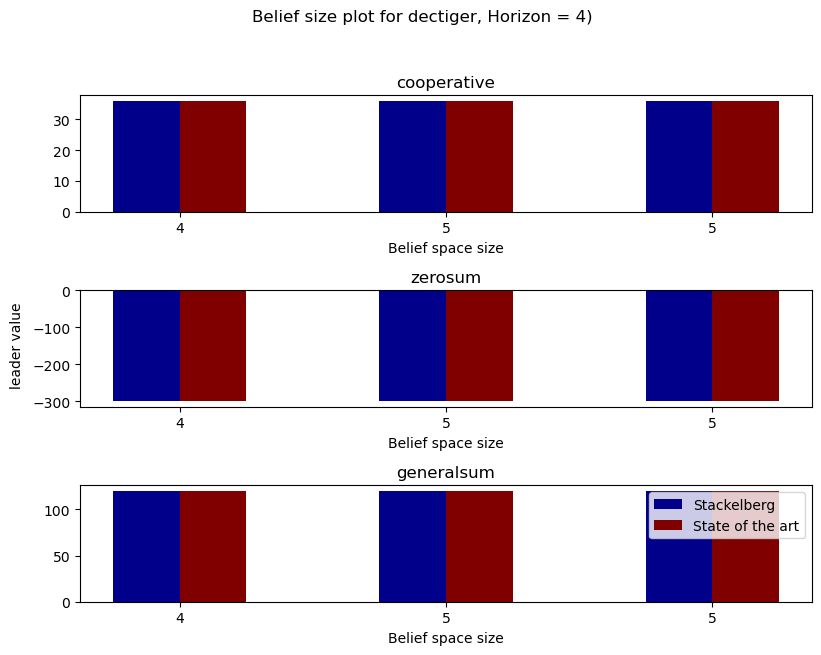

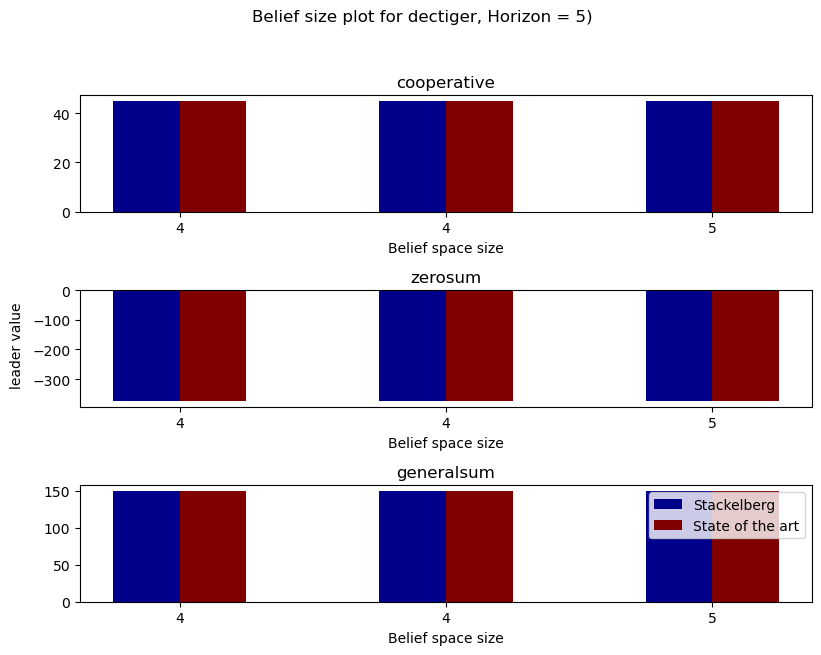

In [8]:
# run experiments 
experiment.run_experiments_decreasing_density(0.2)

In [9]:
for key,belief in experiment.game.value_function.belief_space.belief_dictionary.items():
    print(key,belief.value)

0 [0.5 0.5]
1 [0.5 0.5]
2 [0.03020134 0.96979866]
3 [0.96979866 0.03020134]
4 [9.99031124e-01 9.68876343e-04]


In [10]:
data = pd.DataFrame(experiment.database)
data[(data["gametype"]=="generalsum") & (data["horizon"]==1)]

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density
12,1,generalsum,Stackelberg,1,0.012722,4,30.0,"[70.0, -15.0]",0.200
13,1,generalsum,State of the Art,1,0.012978,4,30.0,"[70.0, -15.0]",0.200
14,1,generalsum,Stackelberg,2,0.013169,4,30.0,"[70.0, -15.0]",0.040
15,1,generalsum,State of the Art,2,0.012937,4,30.0,"[70.0, -15.0]",0.040
16,1,generalsum,Stackelberg,3,0.015147,4,30.0,"[70.0, -15.0]",0.008
17,1,generalsum,State of the Art,3,0.015329,4,30.0,"[70.0, -15.0]",0.008


In [11]:
experiment.comparison_matrix


,Strong Leader Policy,Weak Leader Policy
Strong Follower Policy,"(150.0, 137.5)","[75.0, 68.75]"
Blind Follower Policy,"[75.0, 68.75]","(150.0, 27.5)"


In [12]:
tables = experiment.generate_summary_table()
tables

State of the Art                                           \
                        time leader value iteration number_of_beliefs   
dectiger(1)         0.012978         30.0         3                 4   
dectiger(2)         0.076075         60.0         3                 5   
dectiger(3)         0.122191         90.0         3                 5   
dectiger(4)         0.188430        120.0         3                 5   
dectiger(5)         0.244150        150.0         3                 5   

            Stackelberg                                           
                   time leader value iteration number_of_beliefs  
dectiger(1)    0.012722         30.0         3                 4  
dectiger(2)    0.068641         60.0         3                 5  
dectiger(3)    0.142580         90.0         3                 5  
dectiger(4)    0.277067        120.0         3                 5  
dectiger(5)    0.311718        150.0         3                 5

In [13]:
experiment.generate_comparison_tables()
# current_data = experiment.database[(experiment.database["SOTA"]=="Stackelberg")&(experiment.database["horizon"]==2)&(experiment.database["gametype"]=="generalsum")]
# current_data

cooperative                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                           9.0                      9.0   
1                          18.0                     18.0   
2                          27.0                     27.0   
3                          36.0                     36.0   
4                          45.0                     45.0   

                        zerosum                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                         -75.0                    -75.0   
1                        -150.0                   -150.0   
2                        -225.0                   -225.0   
3                        -300.0                   -300.0   
4                        -375.0                   -375.0   

                     generalsum                           
  State of the Art Leader Value Stackelberg Leader Value  
0                          30.0                     30.0  
1                          60.0                     60.0  
2                          90.0                     90.0  
3                         120.0                    120.0  
4                         150.0                    150.0

In [14]:
data = experiment.database[(experiment.database["SOTA"]==True)&(experiment.database["horizon"]==1)&(experiment.database["gametype"]==gametype)]
data

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density


In [15]:
experiment.generate_summary_table()

State of the Art                                           \
                        time leader value iteration number_of_beliefs   
dectiger(1)         0.012978         30.0         3                 4   
dectiger(2)         0.076075         60.0         3                 5   
dectiger(3)         0.122191         90.0         3                 5   
dectiger(4)         0.188430        120.0         3                 5   
dectiger(5)         0.244150        150.0         3                 5   

            Stackelberg                                           
                   time leader value iteration number_of_beliefs  
dectiger(1)    0.012722         30.0         3                 4  
dectiger(2)    0.068641         60.0         3                 5  
dectiger(3)    0.142580         90.0         3                 5  
dectiger(4)    0.277067        120.0         3                 5  
dectiger(5)    0.311718        150.0         3                 5

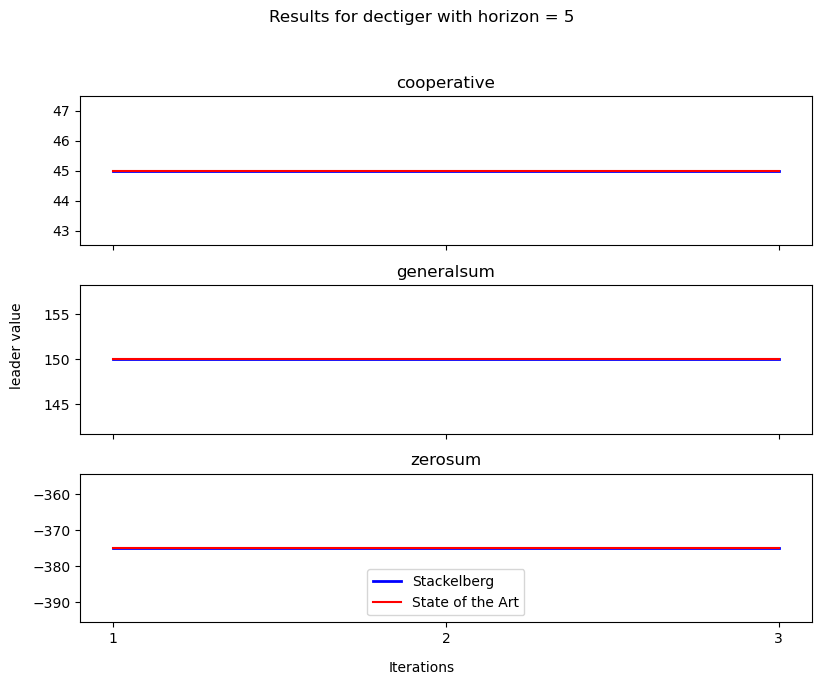

In [16]:
experiment.plots()

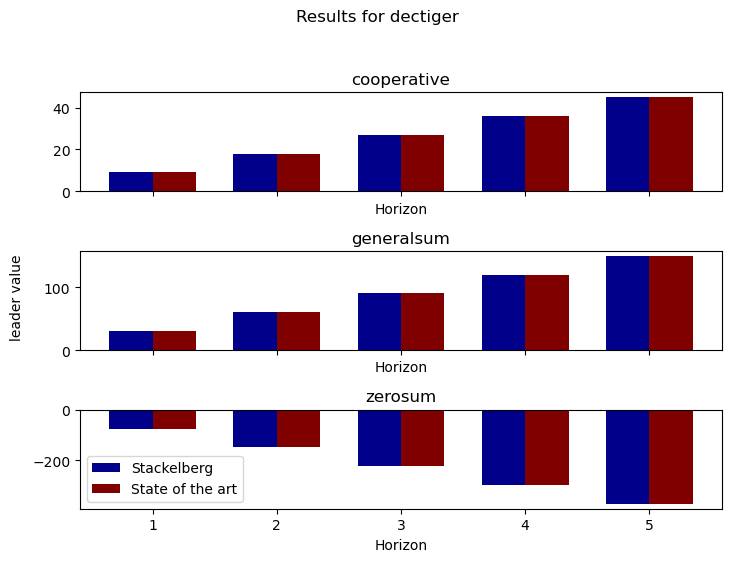

In [17]:
experiment.horizon_value_plot(densities=True)

belief size : [4, 4, 5],
 sota values = [45.0, 45.0, 45.0],
 non-sota-values = [45.0, 45.0, 45.0]  
belief size : [4, 4, 5],
 sota values = [150.0, 150.0, 150.0],
 non-sota-values = [150.0, 150.0, 150.0]  
belief size : [4, 4, 5],
 sota values = [-375.0, -375.0, -375.0],
 non-sota-values = [-375.0, -375.0, -375.0]  


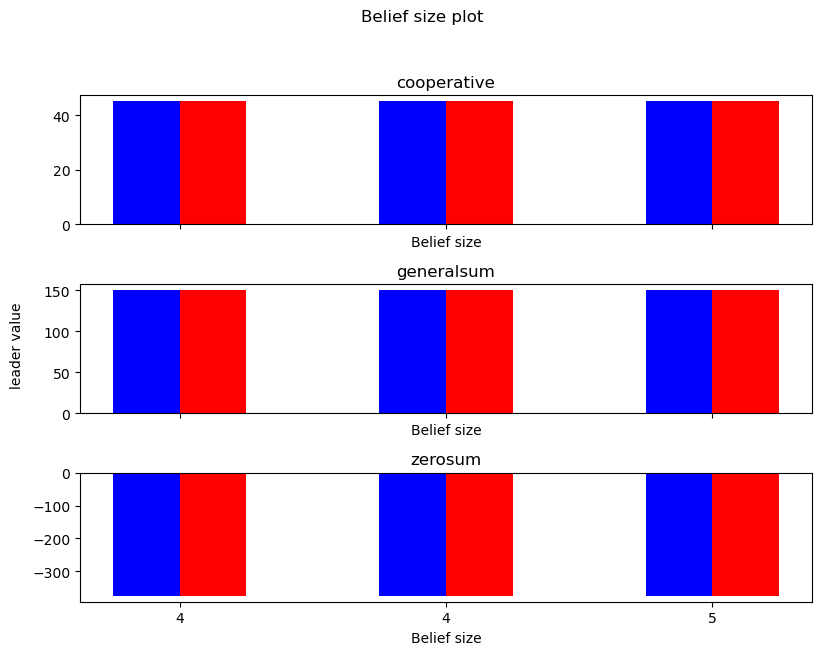

In [18]:
# experiment.density_plot()
data = experiment.database[(experiment.database["gametype"]=="generalsum") & (experiment.database["horizon"]==experiment.planning_horizon)]
data["number_of_beliefs"]

fig, axs = plt.subplots(3, 1, figsize=(9, 7), sharex=True)
colors = ['blue', 'red']
bar_width = 0.25
for idx,gametype in enumerate(["cooperative","generalsum","zerosum"]):
    data = experiment.database[(experiment.database["gametype"]==gametype) & (experiment.database["horizon"]==experiment.planning_horizon)]
    belief_sizes = [value for value in  data["number_of_beliefs"][data["SOTA"]=="State of the Art"]]
    sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="State of the Art"]]
    non_sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="Stackelberg"]]
    axs[idx].set_title(f"{gametype}") 


    print(f"belief size : {belief_sizes},\n sota values = {sota_leader_values},\n non-sota-values = {non_sota_leader_values}  ")
    x = np.arange(len(belief_sizes))  # Generating x-values for bars

    # Plotting
    axs[idx].bar(x - bar_width / 2, sota_leader_values, bar_width, label='Stackelberg', color=colors[0])
    axs[idx].bar(x + bar_width / 2, non_sota_leader_values, bar_width, label='State of the art', color=colors[1])

    # Setting x-axis ticks and labels
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(belief_sizes)
    axs[idx].set_xlabel("Belief size")



fig.suptitle(f"Belief size plot")
fig.text(0.05, 0.5, 'leader value', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust the rect parameter as needed
plt.show()

# experiment.generate_comparison_tables()

In [19]:
experiment.generate_summary_table()

State of the Art                                           \
                        time leader value iteration number_of_beliefs   
dectiger(1)         0.012978         30.0         3                 4   
dectiger(2)         0.076075         60.0         3                 5   
dectiger(3)         0.122191         90.0         3                 5   
dectiger(4)         0.188430        120.0         3                 5   
dectiger(5)         0.244150        150.0         3                 5   

            Stackelberg                                           
                   time leader value iteration number_of_beliefs  
dectiger(1)    0.012722         30.0         3                 4  
dectiger(2)    0.068641         60.0         3                 5  
dectiger(3)    0.142580         90.0         3                 5  
dectiger(4)    0.277067        120.0         3                 5  
dectiger(5)    0.311718        150.0         3                 5

belief size: [4 4 5],
 sota values: [45. 45. 45.],
 non-sota values: [45. 45. 45.]
belief size: [4 4 5],
 sota values: [-375. -375. -375.],
 non-sota values: [-375. -375. -375.]
belief size: [4 4 5],
 sota values: [150. 150. 150.],
 non-sota values: [150. 150. 150.]


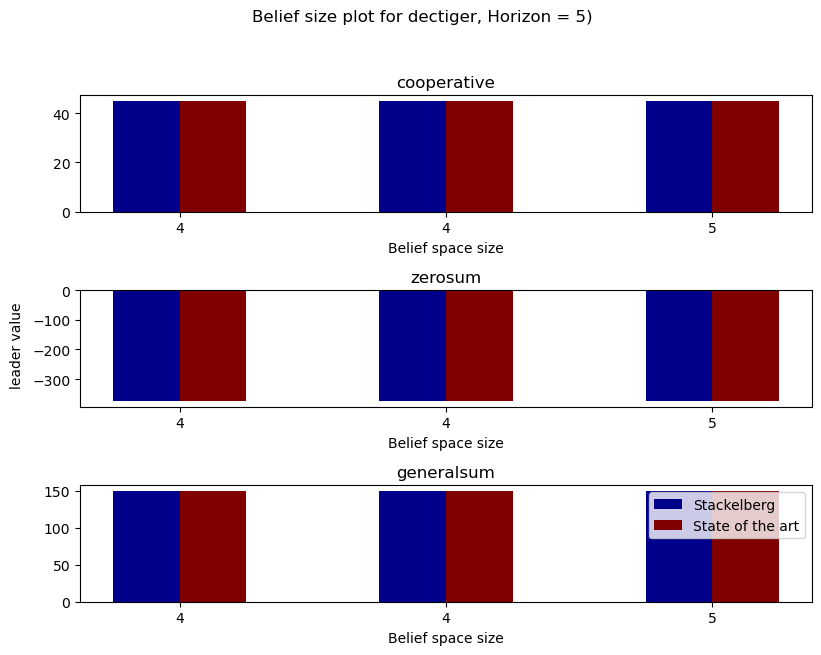

In [20]:
experiment.density_plot()

In [21]:
class ClassA:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def update_shared_data(self, key, value):
        self.shared_data.add_samples(20)


class ClassB:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def read_shared_data(self):
        print(f"ClassB reads shared data: {self.shared_data.time_index_table}")


# Create a shared dictionary
shared_dict = BeliefSpace(3,0.2)

# Instantiate ClassA and ClassB with the shared dictionary
a = ClassA(shared_dict)
b = ClassB(shared_dict)

# Update shared data using ClassA
a.update_shared_data('key1', 'value1')

# Read shared data using ClassB
b.read_shared_data()


Added samples to the beleif space, with density =0.2 , new belief space size = 4 with 3 new belief points
0 : {0} 
1 : {0, 1, 2, 3} 
2 : {0, 1, 2, 3} 
ClassB reads shared data: {0: {0}, 1: {0, 1, 2, 3}, 2: {0, 1, 2, 3}, 3: set()}
